# Chapter 4

## Question 11

Using the `Auto` data set to predict whether a given car has high or low mileage (seems like a regression on `mpg` to me?)

In [1]:
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import sklearn.model_selection
import sklearn.discriminant_analysis
import sklearn.neighbors
sns.set(style="whitegrid")

In [2]:
auto = sm.datasets.get_rdataset("Auto", "ISLR").data

In [3]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### (a) create a binary variable, `mpg01`, that is 1 if `mpg` has a value above the median, and `0` otherwise.

In [4]:
mpg_median = auto.mpg.median()
mpg01 = np.where(auto.mpg > mpg_median, 1, 0)

auto["mpg01"] = mpg01



### (b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem useful?

Scatterplots? Boxplots?

/home/wpg/.local/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/wpg/.local/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/wpg/.local/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


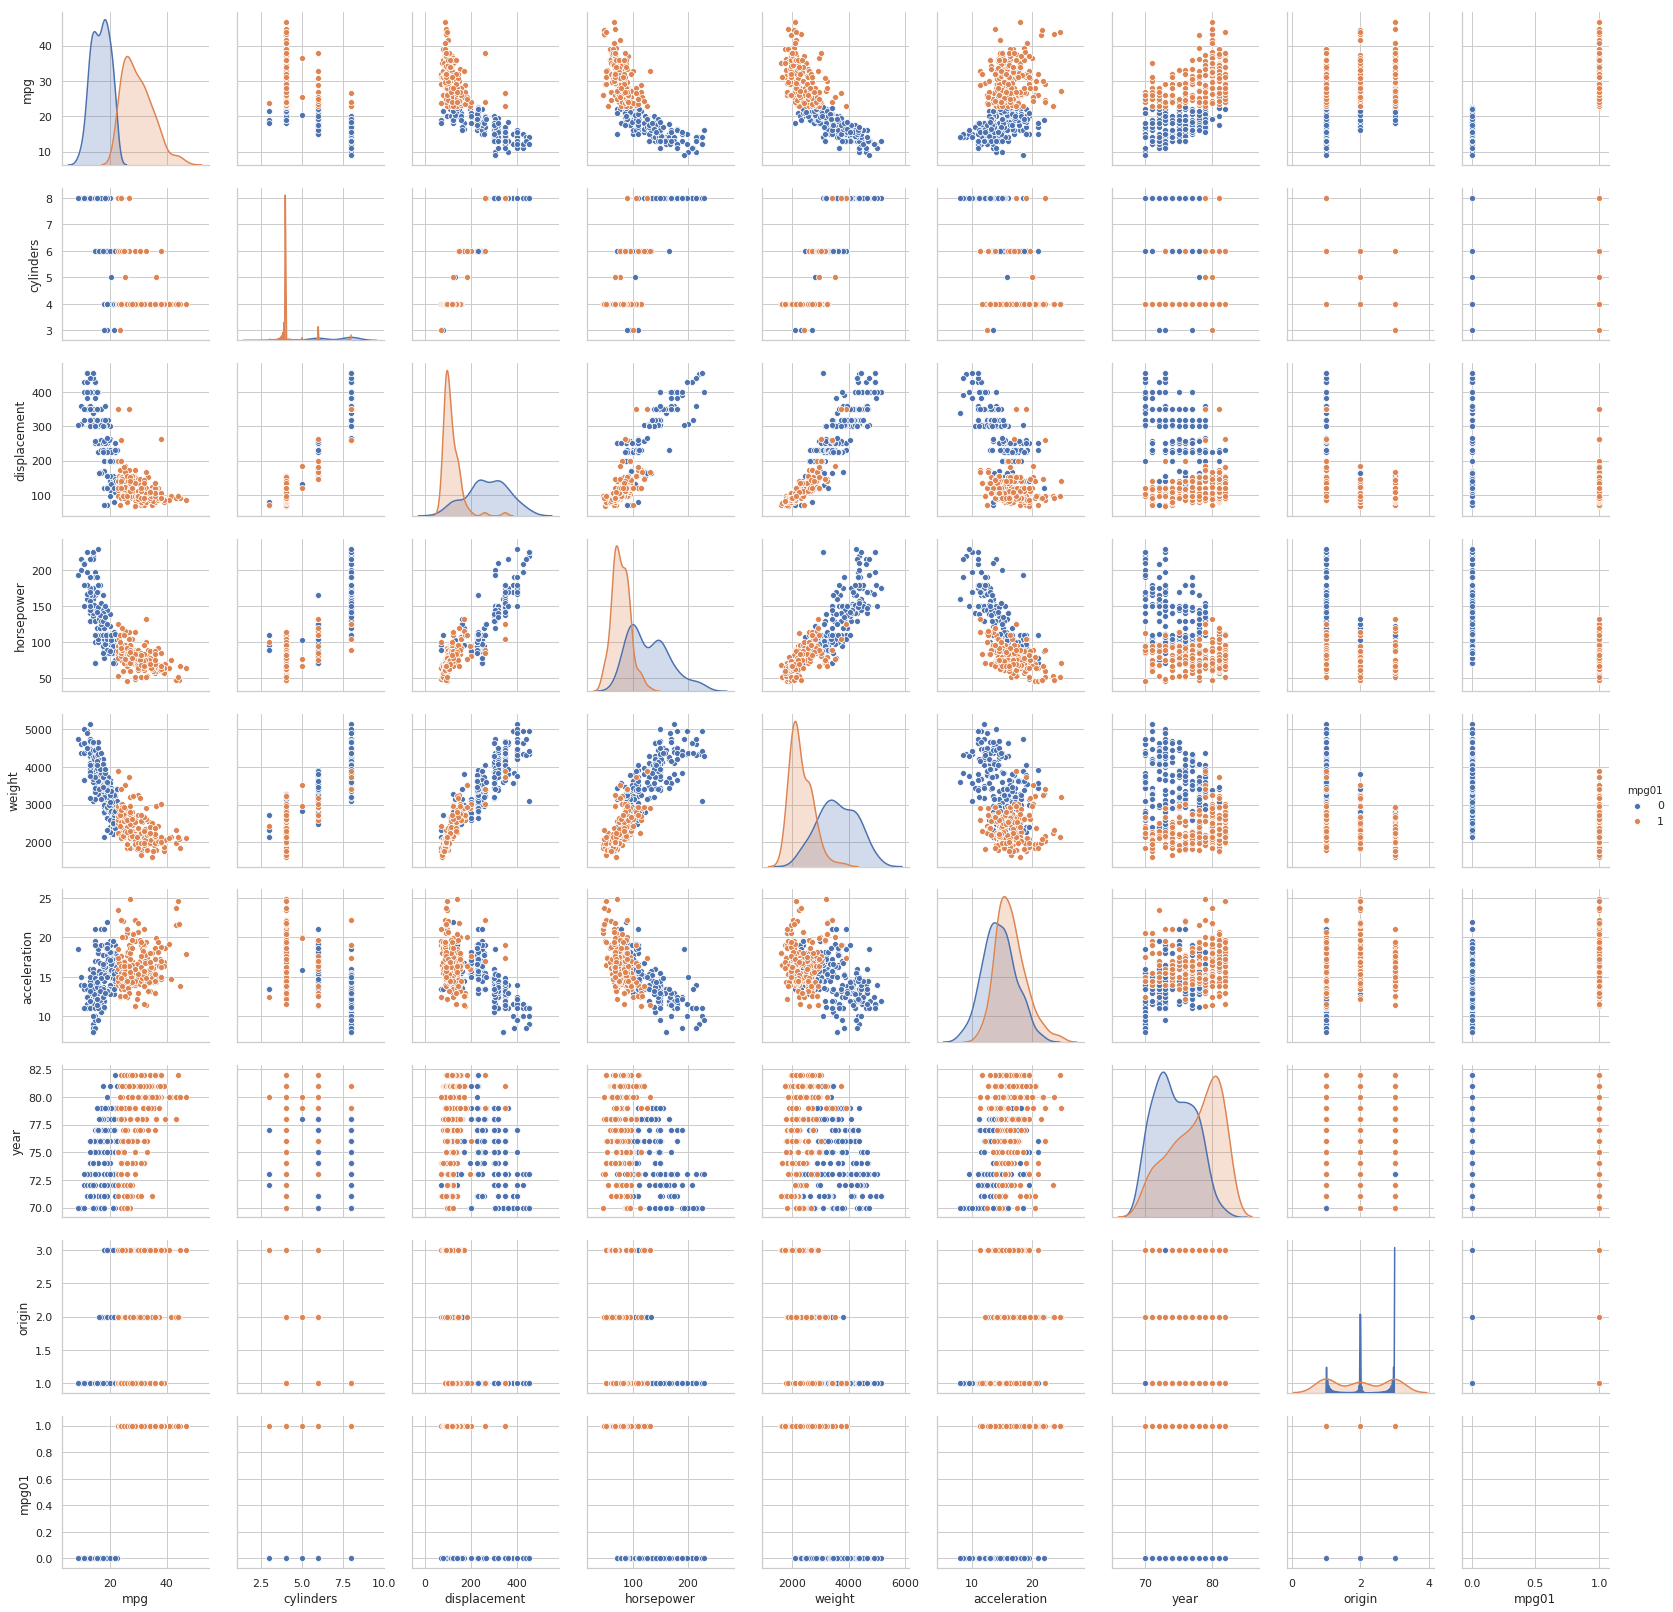

In [5]:
sns.pairplot(auto, hue="mpg01")  #, diag_kws={"cut": 0})

- mpg is highly predictive (obviously)

- Displacement looks pretty good, as does horsepower and weight (all these correlate with each other anyway)

### (c) split the data into test and training data

In [6]:
X = auto[["displacement", "horsepower", "weight"]]
y = auto.mpg01
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

### (d) Perform LDA using the variables identified in (b). What's the test error?

In [7]:
lda_model = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train) # reshape required to cast the training data to a 2d array
y_pred = lda_model.predict(X_test)

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix.ravel()
print(confusion_matrix)
fraction_correct = (tn+tp)/(tn+tp+fn+fp)
print(f"fraction correct: {fraction_correct}")

print(sklearn.metrics.classification_report(y_test, y_pred))


[[32  8]
 [ 1 38]]
fraction correct: 0.8860759493670886
              precision    recall  f1-score   support

           0       0.97      0.80      0.88        40
           1       0.83      0.97      0.89        39

   micro avg       0.89      0.89      0.89        79
   macro avg       0.90      0.89      0.89        79
weighted avg       0.90      0.89      0.89        79



### (e) Perform QDA using the variables identified in (b). What's the test error?

In [8]:
qda_model = sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train) # reshape required to cast the training data to a 2d array
y_pred = qda_model.predict(X_test)

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix.ravel()
print(confusion_matrix)
fraction_correct = (tn+tp)/(tn+tp+fn+fp)
print(f"fraction correct: {fraction_correct}")

print(sklearn.metrics.classification_report(y_test, y_pred))


[[34  6]
 [ 3 36]]
fraction correct: 0.8860759493670886
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        40
           1       0.86      0.92      0.89        39

   micro avg       0.89      0.89      0.89        79
   macro avg       0.89      0.89      0.89        79
weighted avg       0.89      0.89      0.89        79



### (f) Perform logistic regression using the variables identified in (b). What's the test error?

In [9]:
logistic_model = sklearn.linear_model.LogisticRegression()
logistic_model.fit(X_train, y_train) # reshape required to cast the training data to a 2d array
y_pred = logistic_model.predict(X_test)

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix.ravel()
print(confusion_matrix)
fraction_correct = (tn+tp)/(tn+tp+fn+fp)
print(f"fraction correct: {fraction_correct}")

print(sklearn.metrics.classification_report(y_test, y_pred))


[[33  7]
 [ 1 38]]
fraction correct: 0.8987341772151899
              precision    recall  f1-score   support

           0       0.97      0.82      0.89        40
           1       0.84      0.97      0.90        39

   micro avg       0.90      0.90      0.90        79
   macro avg       0.91      0.90      0.90        79
weighted avg       0.91      0.90      0.90        79



/home/wpg/.local/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### (g) Perform KNN on the training data, with several values of K. What test errors do you obtain? What's the best value of K?

In [11]:
for k in range(1,100,1):
    print("-"*40)
    print(f"{k}")
    knn_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train) # reshape required to cast the training data to a 2d array
    y_pred = knn_model.predict(X_test)

    confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix.ravel()
    print(f"confusion matrix:\n {confusion_matrix}")
    fraction_correct = (tn+tp)/(tn+tp+fn+fp)
    print(f"fraction correct:\n {fraction_correct:.2f}")


----------------------------------------
1
confusion matrix:
 [[34  6]
 [ 5 34]]
fraction correct:
 0.86
----------------------------------------
2
confusion matrix:
 [[37  3]
 [ 7 32]]
fraction correct:
 0.87
----------------------------------------
3
confusion matrix:
 [[34  6]
 [ 4 35]]
fraction correct:
 0.87
----------------------------------------
4
confusion matrix:
 [[36  4]
 [ 7 32]]
fraction correct:
 0.86
----------------------------------------
5
confusion matrix:
 [[35  5]
 [ 3 36]]
fraction correct:
 0.90
----------------------------------------
6
confusion matrix:
 [[36  4]
 [ 5 34]]
fraction correct:
 0.89
----------------------------------------
7
confusion matrix:
 [[33  7]
 [ 4 35]]
fraction correct:
 0.86
----------------------------------------
8
confusion matrix:
 [[34  6]
 [ 6 33]]
fraction correct:
 0.85
----------------------------------------
9
confusion matrix:
 [[33  7]
 [ 2 37]]
fraction correct:
 0.89
----------------------------------------
10
confusion m

confusion matrix:
 [[32  8]
 [ 2 37]]
fraction correct:
 0.87
----------------------------------------
98
confusion matrix:
 [[33  7]
 [ 3 36]]
fraction correct:
 0.87
----------------------------------------
99
confusion matrix:
 [[33  7]
 [ 3 36]]
fraction correct:
 0.87


It doesn't seem to make a lot of different, surprisingly, which value of K is chosen. Somewhere around 5 seems good